https://www.google.com/search?q=IMT+%E7%A9%8D%E5%88%86

In [1]:
using Plots
using ForwardDiff
using QuadGK

[ Info: Precompiling ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]


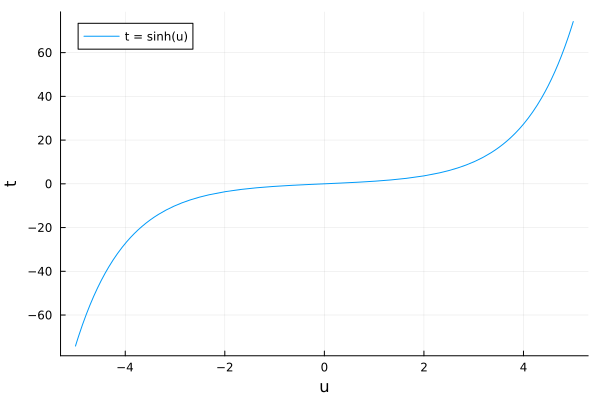

In [2]:
plot(sinh; label="t = sinh(u)", xguide="u", yguide="t")

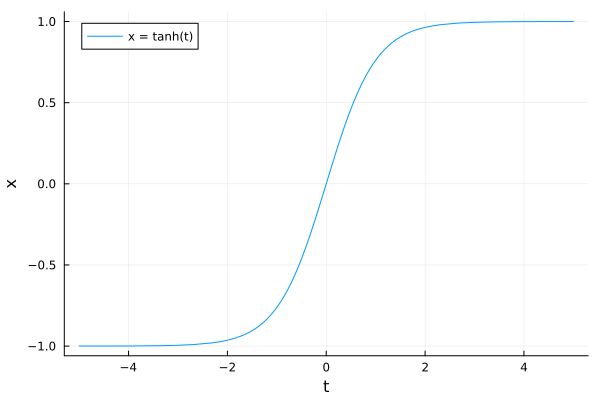

In [3]:
plot(tanh; label="x = tanh(t)", xguide="t", yguide="x")

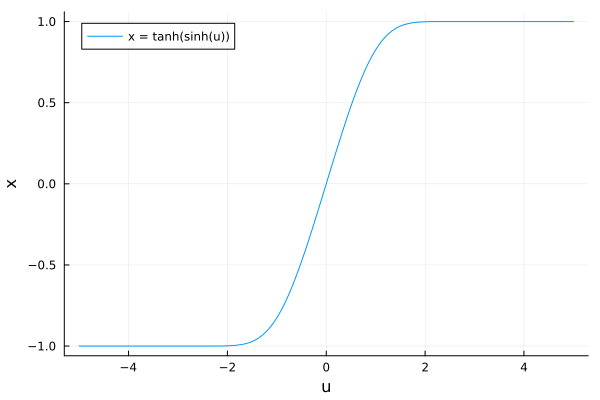

In [4]:
plot(tanh∘sinh; label="x = tanh(sinh(u))", xguide="u", yguide="x")

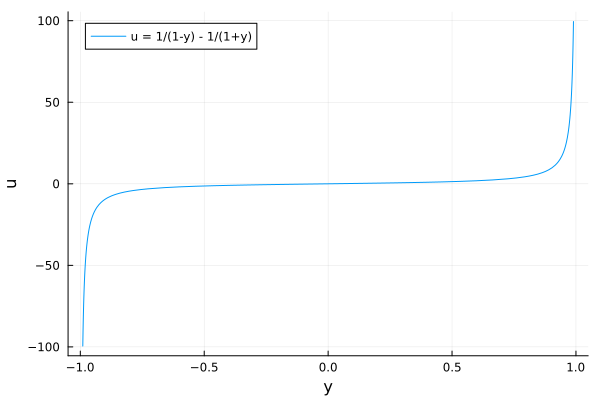

In [5]:
plot(y -> 1/(1-y) - 1/(1+y), -0.99, 0.99; label="u = 1/(1-y) - 1/(1+y)", xguide="y", yguide="u")

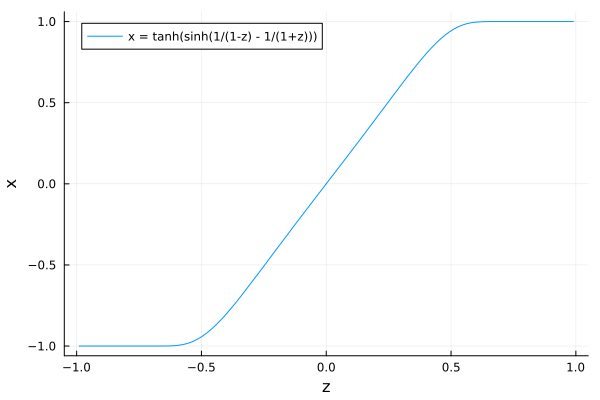

In [6]:
plot(z -> tanh(sinh(1/(1-z) - 1/(1+z))), -0.99, 0.99; label="x = tanh(sinh(1/(1-z) - 1/(1+z)))", xguide="z", yguide="x")

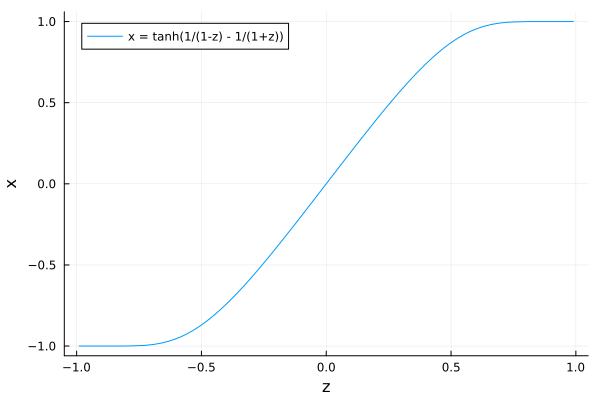

In [7]:
plot(z -> tanh(1/(1-z) - 1/(1+z)), -0.99, 0.99; label="x = tanh(1/(1-z) - 1/(1+z))", xguide="z", yguide="x")

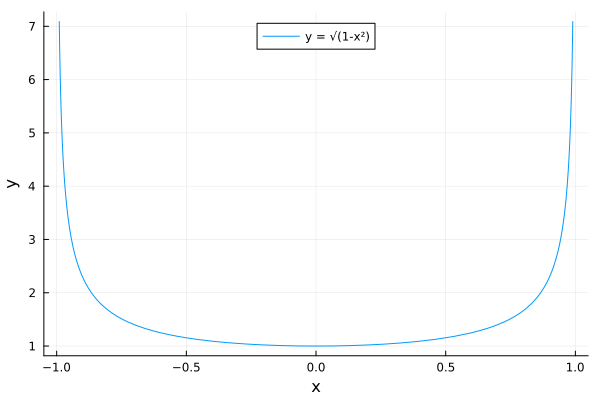

In [8]:
f(x) = 1/√(1 - x^2)
plot(f, -0.99, 0.99; label="y = √(1-x²)", xguide="x", yguide="y", legend=:top)

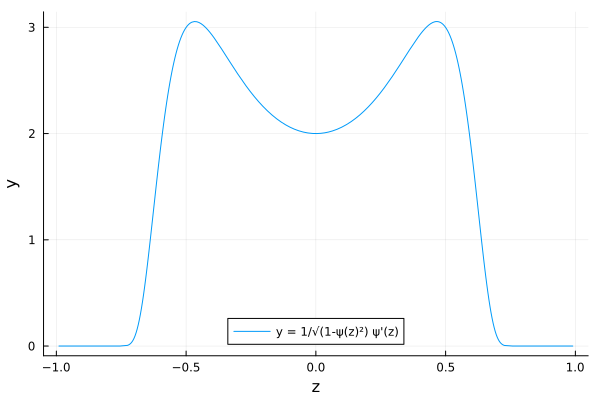

In [9]:
ψ(z) = tanh(sinh(1/(1-z) - 1/(1+z)))
ψ′(z) = ForwardDiff.derivative(ψ, z)
x ∗ y = (x == 0 || y == 0) ? zero(x * y) : x * y

plot(z -> f(ψ(z)) ∗ ψ′(z), -0.99, 0.99;
    label="y = 1/√(1-ψ(z)²) ψ'(z)", xguide="z", yguide="y", legend=:bottom)

In [10]:
x ∗ y = (x == 0 || y == 0) ? zero(x * y) : x * y
safediv(x, y) = x == 0 ? zero(x) : x / y
ψ(z) = tanh(sinh(1/(1-z) - 1/(1+z)))
ψ′(z) = (y = ForwardDiff.derivative(ψ, z); isnan(y) ? zero(y) : y)

function imt(f, n)
    Δx = 2/n
    z(i) = -1 + i*Δx
    g(i) = f(ψ(z(i))) ∗ ψ′(z(i))
    sum(g, 1:n-1) ∗ Δx
end

imt (generic function with 1 method)

In [11]:
f(x) = 1/√(1 - x^2)
[imt(f, 10^k) for k in 1:8]

8-element Vector{Float64}:
 3.2023696217625024
 3.141592621518426
 3.1415926375630034
 3.1415926341026994
 3.141592633657803
 3.1415926337252262
 3.1415926337316407
 3.141592633732904

In [12]:
π

π = 3.1415926535897...

In [13]:
@time quadgk(f, -1, 1)
@time quadgk(f, -1, 1)
@time quadgk(f, -1, 1)

  0.000021 seconds (4 allocations: 7.188 KiB)
  0.000018 seconds (4 allocations: 7.188 KiB)
  0.000019 seconds (4 allocations: 7.188 KiB)


(3.141592621397781, 4.593532512245437e-8)

In [14]:
@time imt(f, 100)
@time imt(f, 100)
@time imt(f, 100)

  0.000013 seconds
  0.000015 seconds
  0.000012 seconds


3.141592621518426